    v1.1 2018/10/23 JLC Ajout image architecture réseau + correction fautes de frappe
    v1.2 2019/06/13 BA  MAJ par Benjamin AILLOUD (stage L2 informatique)
    v2.0 2019/06/16 JLC Reformulation version 2.

<span style="font-weight:bold;color:blue;font-family:arial;font-size:xx-large;">
    Machine learning avec les modules Python Keras & tensorflow 
</span>

<span style="font-weight:bold;color:blue;font-family:arial;font-size:x-large;">
    Conception / entraînement / utilisation d'un réseau de neurones dédié à la reconnaissance de chiffres manuscrits.</span>

Document initialement inspiré du travail de Jason Brownlee : *Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras* publié en juin 2016 à l'adresse https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

# A/ Quelques concepts fondamentaux autour des réseaux de neurones

### Le neurone artificiel
C'est une unité de traitement informatique programmée pour calculer la valeur de sa **fonction d'activation** en un point défini par la **combinaison linéaire de ses entrées** $\Sigma_i w_i x_i - b$ :

<p style="text-align:center; font-style:italic; font-size=xx-small">
    <img src="./figures/nn_1.png" width="600" >
    (crédit image : JLC)
</p>

Le poids $b$ de l'entrée *Bias* fixée à `-1` permet de faire apparaître un effet de **translation** (décalage) de la fonction d'activation.

### Fonction d'activation
Les principaux rôles des fonctions d'activation des neurones artificiels sont :
- donner au neurone artificiel un comportement **non linéaire** (avec par exemple des mécanismes de seuil, de saturation...)
- fixer la plage de sortie de la valeur calculée par le neurone (par exemple sortie dans l'intervalle $[-1 ; 1]$, ou $[0 ; +\infty[$

Exemples de fonction d'activation couramment utilisées :<br />
<p style="text-align:center; font-style:italic; font-size=xx-small">
    <img src="./figures/activationFunctions.png"> 
    (crédit image : JLC)
</p>

### Banque d'images MNIST

Dans ce travail, nous utiliserons les images de la banque MNIST disponible sur Internet (http://yann.lecun.com/exdb/mnist/).

La banque MNIST propose des images en ton de gris de 28 $\times$ 28 pixels, correspondant à des matrice de 28 $\times$ 28 d'entiers compris entre 0 et 255 :
<p style="text-align:center; font-style:italic; font-size=xx-small">
    <img src="./figures/MnistExamples.png" width="500" >
    (crédit image : Josef Steppan — Travail personnel, CC BY-SA 4.0, commons.wikimedia.org/w/index.php?curid=64810040)
</p>

L'ensemble des images du jeu de données MNIST contient **60000 images d'apprentissage** et **10000 images de test**, soit en tout **70000 images** de 28 x 28 pixels.

### Structure du réseau à construire 
Dans un premier temps nous allons construire un simple *réseau dense*, avec :
- une **couche d'entrée** de 784 valeurs comprises entre 0 et 1 (les pixels de l'image 28 $\times$ 28 mis sous forme d'un vecteur de 784 valeurs),
- une **couche cachée** de 784 neurones utilisant la fonction d'activation `relu`,
- une **couche de sortie** à 10 neurones, pour la classification des images en 10 classes associées aux chiffres {0,1,2...9}, utilisant la fonction d'activation `softmax` adaptée aux traitements de classification.

<p style="text-align:center; font-style:italic; font-size=xx-small">
    <img src="./figures/archiReseau.png" width="900">
    (crédit image : JLC)
</p>

La fonction d'activation `softmax` utilisée pour les 10 neurones de la couche de sortie permet de "faire ressortir" la sortie $y_i$ de valeur la plus grande : `softmax` donne une valeur très proche de 1 pour le neurone fournissant la plus grande valeur $y_i$, alors que pour tous les autres neurones, la valeur calculée par `softmax` sera proche de zero.

<p style="text-align:center; font-style:italic; font-size=xx-small">
    <img src="./figures/softmax.png" width="400">
    (crédit image : JLC)
</p>

Remarques : 
- Chaque neurone de la couche cachée reçoit 785 entrées : les 784 valeurs des pixels de l'image plus l'entrée -1. 
- Il y a dons 785 inconnues pour chaque neurone : les 784 poids $w_i$ affectés à chaque entrée $x_i$, plus le  poids $b$ affecté à l'entrée -1 (le biais).
- 785 $\times$ 784 inconnues pour la couche cachée et 785 $\times$ 10 inconnue spour la couche de sortie : au total, 
623290 inconnues à trouver pour faire l'apprentissage du réseau.

#  B/ Environnement Python de travail

<span style="color:brown;font-family:arial;font-size:large"> 
    Le travail qui suit doit se faire dans un <span style="font-weight:bold;">environnement Python 3.6 dédié</span>
    : voir le document <span style="font-style:italic">EnvironnementPython.pdf</span> si vous n'avez pas encore créé
    d'environnement Python dédié pour le travail avec les modules Keras et tensorflow.
</span>

### Environnement Python dédié

Vérification de la version Python de l'environnement dédié : doit être 3.6.x

In [1]:
import sys
sys.version

'3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) \n[GCC 7.3.0]'

Incrustation des tracés matplotlib dans le cahier IPython et import de modules utiles :

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

#### Module Keras

Vérifier la version du module Keras (doit être 2.2.x) :    

In [3]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

La documentation du module Python Keras (en anglais) est disponible sur https://keras.io.

#### Module OpenCV

Vérifier la version du module OpenCV (doit être 3.4.x) :    

In [4]:
import cv2
cv2.__version__

'3.4.2'

# Travail à faire

# 1/ Récupération du jeu de données MNIST :

https://fr.wikipedia.org/wiki/Base_de_données_MNIST : La base de données MNIST (*Mixed National Institute of Standards and Technology*), est une base de données de chiffres écrits à la main. C'est un jeu de données très utilisé en apprentissage automatique.<br /><br />
L'ensemble des images du jeu de données MNIST contient **60000 images d'apprentissage** et **10000 images de test**, soit en tout **70000 images** de 28 x 28 pixels.

In [5]:
# Load data from https://www.openml.org/d/554
from keras.datasets import mnist
(image_train, etiq_train), (image_test, etiq_test) = mnist.load_data() 

<span style="color:blue;font-family:arial">Faire afficher le type des objets `image_train`, `etiq_train`, `image_test` et `etiq_test` :</span>

In [6]:
objs = (image_train, etiq_train, image_test, etiq_test)
for o in objs: print(type(o))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<span style="color:blue;font-family:arial">Faire afficher les attributs `shape` et `dtype` des tableaux `image_train`, `etiq_train`, `image_test` et `etiq_test` -> interpréter les réponses :</span>

In [7]:
for o in objs: print(o.shape, o.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


On a bien 60000 matrice d'entiers 28 x 28 avec les 60000 étiquettes et les 10000 matrice d'entiers 28 x 28 avec les 10000 étiquettes

## 1.1/ Vérification des étiquettes des données : 

<span style="color:blue;font-family:arial">Faire afficher les 10 premières valeurs de `etiq_train` et `etiq_test` ; interpréter les réponses. </span>

In [8]:
print(etiq_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [9]:
print(etiq_test[:10])

[7 2 1 0 4 1 4 9 5 9]


## 1.2/ Visualisation des images  :

<span style="color:blue;font-family:arial;">Avec la fonction `imshow` du module `matplotlib.pyplot` faire afficher la 601-ème image du tableau `image_train`. Indications :<br />

- utiliser `plt.figure(figsize=(5,5))`;<br />
- passer l'argument `cmap='binary'` à la fonction `imshow`;<br/>
- enlever les graduations en X et Y avec l'instruction  `plt.xticks([]); plt.yticks([])`.</span>

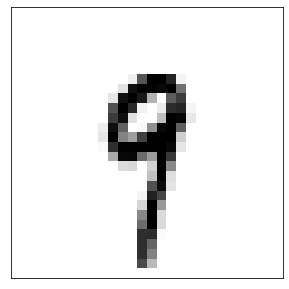

In [10]:
plt.figure(figsize=(5,5))
import matplotlib.pyplot as plt
plt.imshow(image_train[600],cmap='binary')
plt.xticks([]) ; plt.yticks([]);

<span style="color:blue;font-family:arial">Vérifier que l'étiquette associée à `image_train[600]` est bien `9` :</span>

In [11]:
etiq_train[600]

9

<span style="color:blue;font-family:arial">Écrire une fonction `plot_image` qui prend les arguments 'qui vont bien' pour afficher les images MNIST commençant au rang `r` sur `L` lignes et `C` colonnes (utiliser `plt.subplot` pour faire un quadrillage d'images). La figure affichée doit avoir pour dimensions 10 x 10 pouces.

In [12]:
def plot_image(r,L,C):
    plt.figure(figsize=(10,10))
    for i in range(L*C):
        plt.subplot(L, C, i+1)
        plt.imshow(image_train[r+i],cmap='binary', interpolation='none')
        plt.xticks([])
        plt.yticks([])


<span style="color:blue;font-family:arial">Fait afficher 100 images à partir de la 600 ème dans une grille de 10x10 : </span>

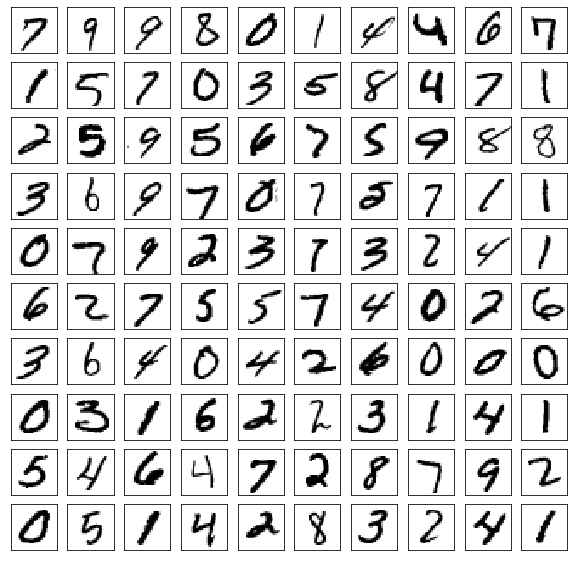

In [13]:
plot_image(599, 10, 10)

# 2/ Pré-traitement des données

**Le pré-traitement des données constitue une des étapes fondamentales de l'apprentissage des réseaux de neurones.**

Pour adapter les données au réseau de neurones, on doit transformer les matrice d'entiers `uint8` représentant les images 28 x 28 pixels en vecteurs **normalisés** $(V_i)_{i=0..783}$ de 784 valeurs réelles $V_i$  avec $ 0 \leqslant V_i \leqslant 1.$

## 2.1/ Transformation des matrices d'entrée en vecteurs normalisés :

In [14]:
nb_image_train, nb_image_test = image_train.shape[0], image_test.shape[0]
nb_pixels = image_train.shape[1] * image_train.shape[2]   # 28 x 28 = 784 pixels

# mise 'à plat' des matrices sous forme de vecteurs de floats 
# Indications: utiliser les méthodes 'reshape(new_shape)' et astype('float32') de ndarray).
x_train = image_train.reshape((nb_image_train, nb_pixels)).astype('float32')
x_test  = image_test.reshape((nb_image_test, nb_pixels)).astype('float32')

# normalisation des tableaux X_train et X_test :
x_train = x_train/255
x_test  = x_test/255

<span style="color:blue;font-family:arial">Vérifier la tailles des tableaux `x_train` et `x_test`  :</span>

In [15]:
print(f"Dimensions du tableu x_train: {x_train.shape}")
print(f"Dimensions du tableu x_test : {x_test.shape}")

Dimensions du tableu x_train: (60000, 784)
Dimensions du tableu x_test : (10000, 784)


<span style="color:blue;font-family:arial">Vérifier les valeurs min et max des tableaux `x_train` et `x_test`  :</span>

In [16]:
print(f"min et max de x_train: {x_train.min()}, {x_train.max()}")
print(f"min et max de x_test : {x_test.min()}, {x_test.max()}")

min et max de x_train: 0.0, 1.0
min et max de x_test : 0.0, 1.0


## 2.2/ 'Hot coding' des étiquettes :

Les étiquettes des images sont des valeurs entières comprises entre 0 et 9. Pour traiter efficacement le problème de classification, on utilise la technique de `hot encoding` qui remplace les valeurs des différentes classes par un vecteur comportant autant d'éléments que de classes à choisir.<br />
Par exemple :
- l'étiquette `0` sera transformée en la vecteur `[1 0 0 0 0 0 0 0 0 0]`.
- l'étiquette `3` sera transformée en la vecteur `[0 0 0 1 0 0 0 0 0 0]`.

Pour réaliser le codage des étiquettes, on utilise la fonction `to_categorical` du module `keras.utils.np_utils` :

In [17]:
from keras.utils.np_utils import to_categorical
# 'hot encoding' des sorties :
y_train = to_categorical(etiq_train)
y_test  = to_categorical(etiq_test)

<span style="color:blue;font-family:arial">Faire afficher les 10 premières valeurs de `etiq_train` et les 10 premières valeurs `hot encoded` de `y_train` :</span>

In [18]:
etiq_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [19]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
len(y_train[0])

10

# 3/ Construction du réseau de neurones :

On va maintenant construire un réseau de neurone **séquentiel** (cf https://keras.io/models/sequential ) en **4 lignes** à l'aide du module **keras** qui permet une manipulation de haut niveau des outils proposés par le module Python **tensorflow**.<br />

Les spécifications du réseau de neurones à construire sont :
- les entrées sont constituées des 784 pixels, mis sous forme d'un vecteur normalisé ;
- le réseau de neurones comporte une première couche de 784 neurones utilisant la fonction d'activation `relu` (*retified linear unit*, voir https://keras.io/activations) ;
- la couche de sortie comporte 10 neurones utilisant la fonction d'activation `softmax` pour convertir les sorties en valeur de probalibilités permettant de choisir une des 10 classes ;
- la fonction d'erreur (différence entre étiquette et valeur prédite par le réseau) est `Logarithmic loss` (dans Keras elle coorepnd à la *loss function* `categorical_crossentropy`) ;
- l'algorithme de descente de gradient ADAM est utilisé pour l'optimisation des poids des neurones par rétro-progation de l'erreur. 

La **fonction d'erreur** (*loss function*) utilisée pour quantifier l'erreur entre l'étiquette associée aux données d'entrée est disponible dans keras sous le nom `categorical_crossentropy`:

<p style="text-align:center; font-style:italic; font-size=xx-small">
    <img src="./figures/CrossEntropy.png" width=650>
    (crédit image : Deep Learning TensorFlow - Martin Gorner)
</p>

## Rendre les tirages aléatoires reproductibles

Les poids d'un réseau de neurones sont initialisés par tirage aléatoire : on fixe la **graine**  du générateur `numpy.random` (*seed*) pour avoir des suites de nombres aléatoires reproductibles :

In [21]:
seed = 43
np.random.seed(seed)

## Construction du réseau de neurones dense en 4 lignes avec le module Keras :

In [22]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense 

nb_classes = len(y_train[0])

# les 4 lignes pour construire le réseau de neurones:
model = Sequential()
model.add(Dense(nb_pixels, input_dim=nb_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(nb_classes, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0701 22:28:43.580329 139632341882688 deprecation_wrapper.py:119] From /home/jlc/work/miniconda3/envs/pyml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 22:28:43.669618 139632341882688 deprecation_wrapper.py:119] From /home/jlc/work/miniconda3/envs/pyml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 22:28:43.686503 139632341882688 deprecation_wrapper.py:119] From /home/jlc/work/miniconda3/envs/pyml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0701 22:28:43.755824 139632341882688 deprecation_wrapper.py:119] From /home/jlc/work/miniconda3/envs/pyml/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please u

<span style="color:blue;font-family:arial">Avec la méthode `summary` de l'objet `model`, faire afficher la description du modèle : expliquer les valeurs des paramètres ?</span>

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


Peux-tu retouver le nombre total de paramètres :

In [24]:
784*785 + 10*785

623290

# 4/ Entraînement du réseau :

Le modèle est entraîné sur les $60\,000$ images,
- 10 fois de suite (paramètre `epochs`), 
- avec mises à jour des poids toutes les 200 images (paramètre `batch_size`),
en utilisant les données d'entrée `x_train` (images) et les données de sortie `y_train` (étiquettes) :

In [25]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=1)

W0701 22:28:43.994246 139632341882688 deprecation.py:323] From /home/jlc/work/miniconda3/envs/pyml/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0701 22:28:44.068696 139632341882688 deprecation_wrapper.py:119] From /home/jlc/work/miniconda3/envs/pyml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.2762 - acc: 0.9209 - val_loss: 0.1437 - val_acc: 0.9571
Epoch 2/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.1112 - acc: 0.9680 - val_loss: 0.0934 - val_acc: 0.9722
Epoch 3/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0710 - acc: 0.9800 - val_loss: 0.0773 - val_acc: 0.9769
Epoch 4/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0506 - acc: 0.9854 - val_loss: 0.0677 - val_acc: 0.9786
Epoch 5/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0362 - acc: 0.9895 - val_loss: 0.0629 - val_acc: 0.9796
Epoch 6/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0259 - acc: 0.9934 - val_loss: 0.0579 - val_acc: 0.9812
Epoch 7/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0203 - acc: 0.9951 - val_loss: 0.0592 - val_a

### Tracé des courbes `accuracy` et `loss` :

In [26]:
def plot(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(15,5))
    ax1 = plt.subplot(1,2,1)
    ax1.plot(history.history['acc'], 'o-',label='Train')
    ax1.plot(history.history['val_acc'], 'o-', label='Test')
    ax1.set_title('Model accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch') 
    ax1.grid()
    ax1.legend(loc='best')
    # Plot training & validation loss values
    ax2 = plt.subplot(1,2,2)
    ax2.plot(history.history['loss'], 'o-', label='Train')
    ax2.plot(history.history['val_loss'], 'o-',  label='Test')
    ax2.set_title('Model loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='best')
    ax2.grid()
    plt.show()

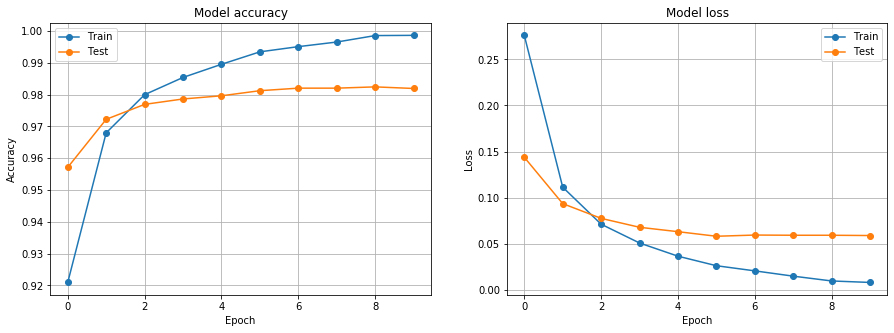

In [27]:
plot(history)

Entrainer le réseau plus longtemps (par augmentation du paramètre `epochs` peut permettre d'aumengenter les performances du réseau... mais les courbes de précision du test (*test accuracy*) restent asymptotiquement en-dessous des 98 %.


# 5/ Vérication de l'apprentissage avec le jeu de test

La méthode `predict`permet de demander au modèle sa prédiction pour une ou plusieurs entrées.<BR />
Exemple de prédition pour une image test numéro i dans le jeu d'images de test (0 <= i <= 10000) :

valeur trouvée par le réseau de neurones : [0.0000 0.0000 0.0000 0.0006 0.0000 0.0000 0.0000 0.0001 0.0000 0.9993]
valeur trouvée arrondie  : [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
rep[0].argmax() donne    : 9

La bonne réponse est 9, soit en 'hot coded' : [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]


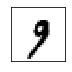

In [28]:
i = 1000
rep = model.predict(x_test[i:i+1])

np.set_printoptions(formatter={'float':'{:0.4f}'.format})
print("valeur trouvée par le réseau de neurones :", rep[0])

np.set_printoptions(formatter={'float':'{:0.1f}'.format})
print("valeur trouvée arrondie  : {}".format(rep[0]))
print("rep[0].argmax() donne    : {}".format(rep[0].argmax()))

plt.figure(figsize=(1,1))
digit = image_test[i]
plt.xticks([]); plt.yticks([])
plt.imshow(digit, cmap='binary');
print(f"\nLa bonne réponse est {etiq_test[i]}, soit en 'hot coded' : {y_test[i]}")

<span style="color:blue;font-family:arial">Écrire les instructions Python pour calculer avec les données de test le pourcentage d'erreur du réseau entrainé.... <br/> 
Conseil: la variable rep contient pour chaque image une liste de 10 probabilités, il pourra être utile d'utiliser la fonction argmax de la librairie numpy pour obtenir le chiffre de plus haute probabilité.</span>


In [29]:
results = model.predict_on_batch(x_test)
bonne_rep = 0
for i, res in enumerate(results):
    bonne_rep += (np.argmax(res) == etiq_test[i])
print(f"taux de réussite : {bonne_rep/len(x_test)*100 : .2f} %")

taux de réussite :  98.19 %


# 6/ Évolution du réseau : augmentation du nombre de couches cahées 

On peut essayer de construire un réseau avec plus de couches. Par exemple :
- couche d'entrée avec les 784 pixels
- couche cachée 1 : 784 neurones, fonction d'activation `relu`
- couche cachée 2 : 300 neurones, fonction d'activation `relu`
- couche cachée 3 : 100 neurones, fonction d'activation `relu`    
- couche de sortie : 10 neurone, fonction d'activation `softmax`.

Peux-tu conctruire le réseau `model2` correspondant avec Keras :

In [30]:
nb_classes = len(y_train[0])

model2 = Sequential()
model2.add(Dense(784, input_dim=nb_pixels, kernel_initializer='normal', activation='relu'))
model2.add(Dense(300, kernel_initializer='normal', activation='relu'))
model2.add(Dense(100, kernel_initializer='normal', activation='relu'))
model2.add(Dense(nb_classes, kernel_initializer='normal', activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<span style="color:blue;font-family:arial">Avec la méthode `summary` de l'objet `model2`, faire afficher la description du modèle : expliquer les valeurs des paramètres ?</span>

In [31]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 882,050
Trainable params: 882,050
Non-trainable params: 0
_________________________________________________________________


Entraîner le réseau `model2` avec les mêmes données que `model`, et faire tracer les courbes de précission et d'erreur :

In [32]:
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.2877 - acc: 0.9185 - val_loss: 0.1228 - val_acc: 0.9626
Epoch 2/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0974 - acc: 0.9713 - val_loss: 0.0871 - val_acc: 0.9723
Epoch 3/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0598 - acc: 0.9816 - val_loss: 0.0671 - val_acc: 0.9801
Epoch 4/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0400 - acc: 0.9873 - val_loss: 0.0702 - val_acc: 0.9791
Epoch 5/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0294 - acc: 0.9904 - val_loss: 0.0611 - val_acc: 0.9819
Epoch 6/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0229 - acc: 0.9925 - val_loss: 0.0689 - val_acc: 0.9813
Epoch 7/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0175 - acc: 0.9942 - val_loss: 0.0720 - 

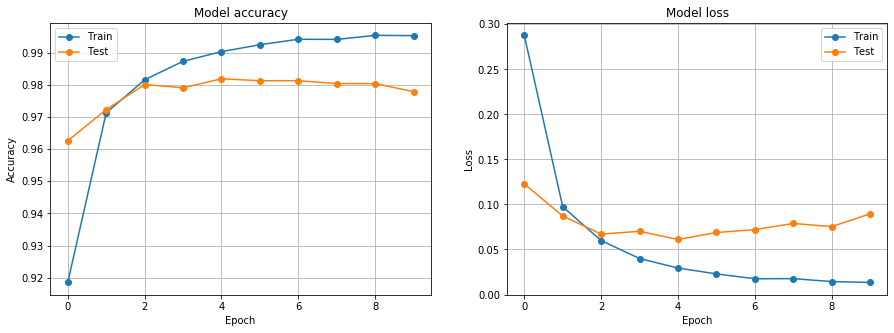

In [33]:
plot(history2)

<span style="color:blue;font-family:arial"> Augmenter le nombre de couches a t'il un impact sur les performances du réseau ?<br />
Que peut on conclure sur l'utilité de complexifier ce type de réseau ? </span>

À priori, on peut voir que l'augmentation du nombre de couches cachées n'a pas un grand impact sur la précision du résea : la reconnaissance lors des tests tourne toujours autour des 98%.
Il semble donc peu utile de complexifier ce type de réseau...

# 7/ Utiliser le réseau avec ses propres images

On va utiliser le réseau entrainé pour voir comment il réagit avec des chiffres "écrits à la main" différents des chiffres de la banque MNIST...<br />
Pour cela on utilise les images du dossier `chiffres` :

In [34]:
import os
images = ['chiffres/'+f for f in os.listdir('chiffres') if f.endswith(".png") or f.endswith(".jpg")]
images.sort()
print(f"Liste des images envoyées : {images}")

Liste des images envoyées : ['chiffres/0_jlc.png', 'chiffres/1_jlc.png', 'chiffres/2_jlc.png', 'chiffres/3_jlc.png', 'chiffres/4_jlc.png', 'chiffres/5_jlc.png', 'chiffres/6_jlc.png', 'chiffres/7_jlc.png', 'chiffres/8_jlc.png', 'chiffres/9_jlc.png']


### Lecture des fichiers image avec openCV

In [35]:
import cv2
# lecture des images -> matrices ndarray 28x28 
input_data = [255-cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2GRAY) for image in images]
input_data = np.array(input_data)
input_data.shape, input_data.dtype  # on doit avoir 4 matrices de 28 x 28 valeurs 

((10, 28, 28), dtype('uint8'))

#### Visualistion des images :

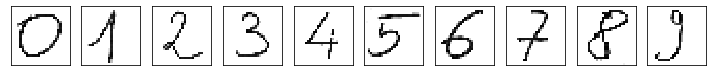

In [36]:
plt.figure(figsize=(15,5))
for i,M in enumerate(input_data):  
    plt.subplot(1,12,i+1)
    plt.imshow(input_data[i], cmap='binary', interpolation='none');
    plt.xticks([]); plt.yticks([])

transformation des matrices 28x28 en vecteurs de float normalisés :

In [37]:
nb_images = input_data.shape[0]
# mise 'à plat' des matrices sous forme de vecteurs de floats :
x_photo = input_data.reshape(nb_images, 28*28).astype('float32')
# normalisation des données :
x_photo /= 255

prédiction du réseau entrainé, avec les images perso :

In [38]:
np.set_printoptions(formatter={'float': '{:0.3f}'.format})
rep = model.predict(x_photo)
print(rep)

[[0.541 0.004 0.355 0.004 0.001 0.085 0.000 0.005 0.000 0.005]
 [0.000 0.964 0.000 0.006 0.001 0.004 0.007 0.004 0.013 0.002]
 [0.000 0.000 0.968 0.006 0.000 0.004 0.000 0.000 0.022 0.000]
 [0.000 0.000 0.001 0.999 0.000 0.000 0.000 0.000 0.001 0.000]
 [0.000 0.000 0.000 0.000 0.990 0.001 0.008 0.001 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.995 0.000 0.000 0.004 0.000]
 [0.000 0.000 0.004 0.000 0.000 0.990 0.005 0.000 0.001 0.000]
 [0.000 0.012 0.984 0.003 0.000 0.000 0.001 0.000 0.000 0.000]
 [0.001 0.000 0.000 0.003 0.001 0.645 0.165 0.000 0.184 0.000]
 [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]]


In [39]:
[r.argmax() for r in rep]

[0, 1, 2, 3, 4, 5, 5, 2, 5, 3]

In [40]:
rep = model2.predict(x_photo)
print(rep)

[[0.065 0.000 0.911 0.000 0.000 0.002 0.000 0.021 0.000 0.000]
 [0.001 0.468 0.008 0.346 0.012 0.014 0.002 0.010 0.031 0.109]
 [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.998 0.002 0.000 0.000 0.000]
 [0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.987 0.007 0.000 0.005 0.000]
 [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]]


In [41]:
[r.argmax() for r in rep]

[2, 1, 2, 3, 4, 5, 5, 2, 5, 3]

Le résultat n'est pas terrible : pour améliorer les performances du réseau il est nécessaire de changer d'architecture pour passer sur des réseaux de type **convolutionnel**, ce qui est l'objet du cahier IPython `TP_MNIS_Keras_convolutionnel.ipynb`.

# Suite....

Pour aller au-delà des 98% de reconnaissance des chiffres, il faut passer à une autre architecture de réseau plus adaptée au traitement des images : les réseaux **convolutionnels**, traités dans le cahier IPython `TP_MNIS_Keras_convo.ipynb`.